In [104]:
!pip install seaborn
!pip install tensorflow
!pip install pandas
!pip install -U scikit-learn scipy matplotlib

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/includ

distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.

In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

#Importo test e test set
train_raw = pd.read_csv("./train.csv")
test_raw = pd.read_csv("./test.csv")

In [106]:
train_raw.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Yes,6776-TLWOI,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,64.55
1,No,0036-IHMOT,Female,0,Yes,Yes,55,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.70,5656.75
2,No,2843-CQMEG,Male,0,No,No,24,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,49.70,1218.25
3,No,3247-MHJKM,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2
4,No,1194-BHJYC,Male,0,Yes,No,61,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,62.15,3778.85


In [107]:
train_raw.tail()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4220,Yes,1271-SJBGZ,Male,1,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,43.65,526.95
4221,No,5977-CKHON,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),92.55,4039
4222,No,3635-JBPSG,Female,0,No,No,15,No,No phone service,DSL,...,Yes,No,No,No,Yes,Two year,Yes,Mailed check,38.80,603
4223,No,4475-NVTLU,Male,0,Yes,Yes,45,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.20,903.7
4224,No,2038-YSEZE,Female,0,No,No,29,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,67.45,1801.1


In [108]:
train_raw.columns.values

array(['Churn', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [109]:
train_raw.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [110]:
train_raw.TotalCharges = pd.to_numeric(train_raw.TotalCharges, errors='coerce')
train_raw.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

In [111]:
train_raw["TotalCharges"].dtypes

dtype('float64')

Ho visto che TotalCharges era di tipo object , dovrebbero essere tutti gli importi di ricarica totali . Provo a vedere se qualche importo è di tipo NaN cosi da scartarlo . Facendo questa analisi ( convertendo Total Charges da object a float ) riesco a capire che 8 celle hanno valore nullo quindi le scarto . 

In [112]:
#Rimuovo i valori mancanti (nAn)
train_raw.dropna(inplace = True)

In [113]:
#Verifica rimozione
train_raw.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [114]:
tr2= train_raw.drop("customerID", axis=1)
tr2

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Yes,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,64.55
1,No,Female,0,Yes,Yes,55,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.70,5656.75
2,No,Male,0,No,No,24,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,49.70,1218.25
3,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20
4,No,Male,0,Yes,No,61,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,62.15,3778.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,Yes,Male,1,No,No,12,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,43.65,526.95
4221,No,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),92.55,4039.00
4222,No,Female,0,No,No,15,No,No phone service,DSL,No,Yes,No,No,No,Yes,Two year,Yes,Mailed check,38.80,603.00
4223,No,Male,0,Yes,Yes,45,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.20,903.70


In [115]:
tr2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
tr2['Churn'].replace(to_replace='No',  value=0, inplace=True)

Converto i valori di Churn in valori binari e ora lo farò anche per gli altri valori 

In [116]:
tr2_dummies = pd.get_dummies(tr2)
tr2_dummies.head()

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,3,19.85,64.55,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
1,0,0,55,103.70,5656.75,1,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
2,0,0,24,49.70,1218.25,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,20.20,20.20,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0,0,61,62.15,3778.85,0,1,0,1,1,...,1,0,0,1,0,1,0,0,0,1


Ho convertito anche tutti gli altri valori , utilizzando questo metodo get_dummies al fine di semplificare l'analisi dei dati e delle rappresentazioni grafiche 

<AxesSubplot:>

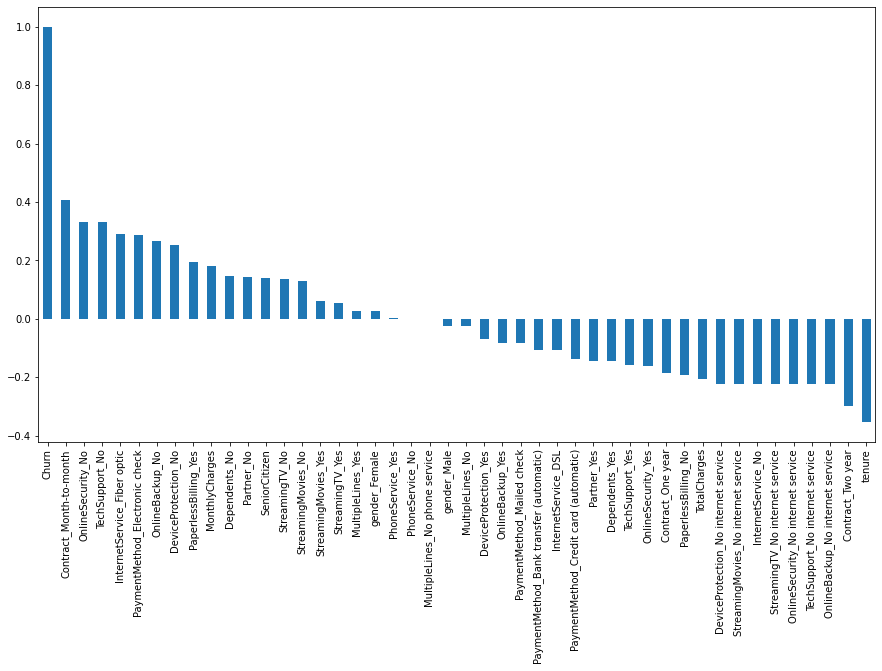

In [117]:
#Calcolo della correlazione fra Churn e le altre variabili 
plt.figure(figsize=(15,8))
tr2_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Una correlazione potrebbe essere positiva, nel senso che entrambe le variabili si muovono nella stessa direzione, o negativa, nel senso che quando il valore di una variabile aumenta, i valori delle altre variabili diminuiscono. La correlazione può anche essere neutra o zero, il che significa che le variabili non sono correlate. Ad esempio come possiamo vedere dal grafico il "gender" il genere del sesso è poco correlato con il tasso di abbandono , intuitivamente lo considero giusto . 

È interessante notare che servizi come sicurezza online, streaming TV, backup online, supporto tecnico, ecc. senza connessione a Internet sembrano essere correlati negativamente al tasso di abbandono.

## Analisi dei dati

Questa parte la dedicherò interamente ad analizzare i dati e le loro specifiche , classificandoli e facendomi un'idea per poi studiare solamente le tendenze interessanti per l'analisi .

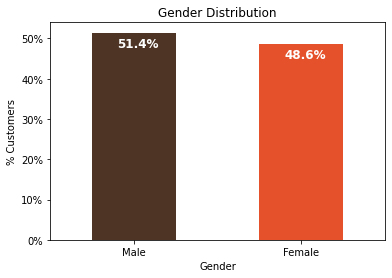

In [118]:
colors = ['#4D3425','#E4512B']
ax = (train_raw['gender'].value_counts()*100.0 /len(train_raw)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# creo un elenco per raccogliere i dati plt.patches
totals = []

#trova i valori e aggiungi alla lista
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width sinistra o destra; get_y su o giu
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Riportata percentuale dei Maschi e Femmine , quasi equa .

Text(0.5, 1.0, '% of Senior Citizens')

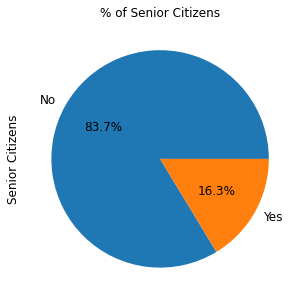

In [119]:
ax = (train_raw['SeniorCitizen'].value_counts()*100.0 /len(train_raw))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Da come possiamo vedere il tasso di anzianità è molto basso , quindi gli utenti sono per lo piu giovani , ciò mi potrebbe indurre a pensare che essendo piu giovani molti possano essere alla ricerca di offerte piu economiche data la loro instabilità lavorativa .

/home/alessandro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

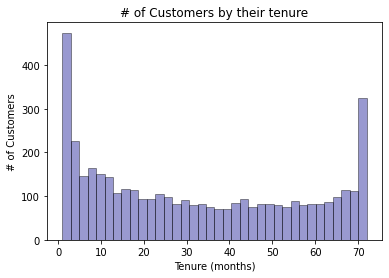

In [120]:
ax = sns.distplot(train_raw['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Molti clienti sono stati nella società per almeno un mese e poi circa la metà di essi ha lasciato poco dopo , mentre molti altri sono nella società da piu di 70 mesi , ciò può essere dovuto alla tipologia di contratto che è stato stipulato , difficoltà nel rescindere il contratto ? Tipologia di contratto cambiato nel tempo ? 

Text(0.5, 1.0, '# of Customers by Contract Type')

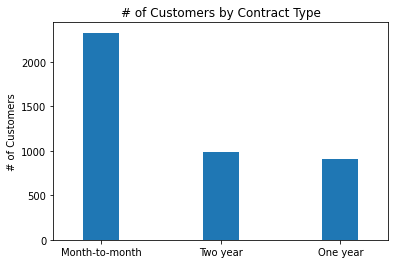

In [121]:
ax = train_raw['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Come possiamo vedere la maggior parte dei clienti preferisce il contratto fatto mese per mese , mentre è quasi invariata la differenze di quelli che prediligono il contratto di 2 o 1 anno .

Text(0.5, 1.0, 'Two Year Contract')

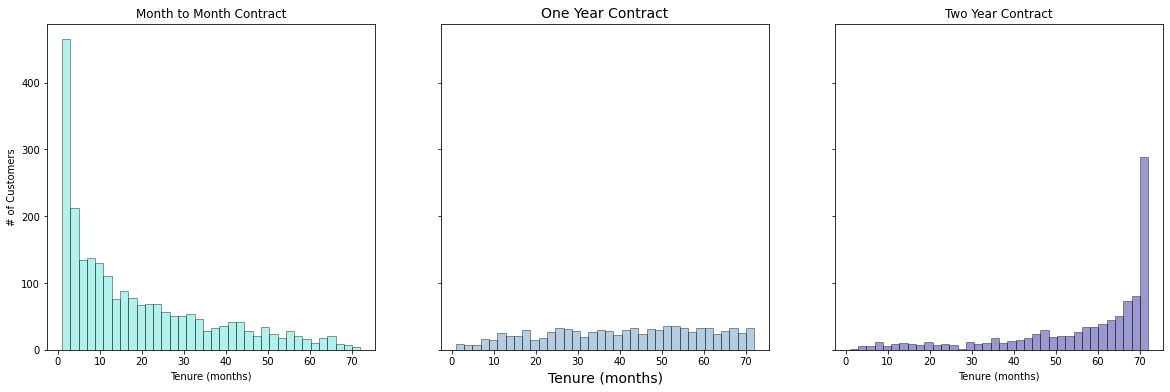

In [122]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

#distplot mi consente di verificare le variazioni di piu parametri in un solo grafico 

ax = sns.distplot(train_raw[train_raw['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(train_raw[train_raw['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(train_raw[train_raw['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Ho generato 3 grafici che mi consentono di vedere la Tenure a seconda dei contratti stipulati . Come possiamo vedere la maggior parte dei clienti che fa un contratto mensile , abbandona la compagnia dopo qualche mese , ovviamente ciò è dato anche dai pochi "vincoli" che potrebbero essere imposti dato che la scadenza del contratto c'è ad ogni mese . 
Mentre chi stipula un contratto a lungo termine è molto piu fedele,  come possiamo vedere nell'ultimo grafico , i contratti di questa tipologia durano piu di 70 mesi .

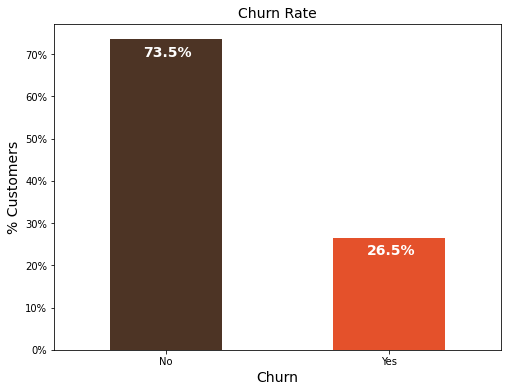

In [123]:
colors = ['#4D3425','#E4512B']
ax = (train_raw['Churn'].value_counts()*100.0 /len(train_raw)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)


totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

Il grafico parla chiaro e ci dice che il 73.5% delle persone non abbandona l'operatore mentre il 26.5% si . Mi aspettavo sinceramente un tasso di NON abbandono un po piu elevato . I dati non sono stati del tutto trattati quindi potrebbero esserci dei falsi negativi , delle asimmetrie che dovremmo individuare e correggere 

Ora analizzerò il Churn in base ad altre specifiche come la tipologia di contratto , il livello di anzianità , charges ecc ...

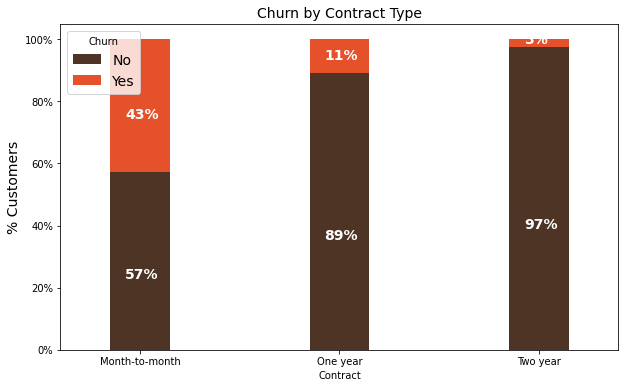

In [124]:
colors = ['#4D3425','#E4512B']
contract_churn = train_raw.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# codice per aggiungere etich. al grafico
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',  #numerelli
               weight = 'bold',
               size = 14)

Come già capito i clienti con il contratto mensile hanno un tasso di abbandono molto elevato. 

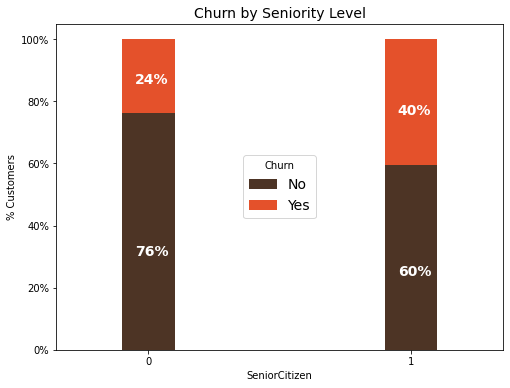

In [125]:
colors = ['#4D3425','#E4512B']
seniority_churn = train_raw.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Gli anziani hanno quasi il doppio del tasso di abbandono rispetto alla popolazione più giovane

Text(0.5, 1.0, 'Distribution of total charges by churn')

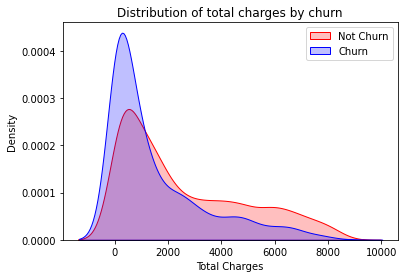

In [126]:
ax = sns.kdeplot(train_raw.TotalCharges[(train_raw["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(train_raw.TotalCharges[(train_raw["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Sembra come se quando le spese totali sono minori ci fosse una maggiore voglia di abbandonare l'operatore ...

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

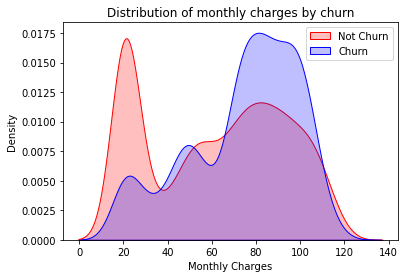

In [127]:
ax = sns.kdeplot(train_raw.MonthlyCharges[(train_raw["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(train_raw.MonthlyCharges[(train_raw["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In questo caso invece , quando le spese mensili sono alte , la percentuale di abbandono è abbastanza elevata ..

### Prima di passare all'addestramento dei dati , faccio della pulizia sui dati di test .
Attuo gli stessi procedimenti che ho fatto inizialmente con i dati di train

In [128]:
test_raw.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [129]:
test_raw.TotalCharges = pd.to_numeric(test_raw.TotalCharges, errors='coerce')
test_raw.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [130]:
test_raw.dropna(inplace = True)
test_raw.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [131]:
tes2= test_raw.drop("customerID", axis=1)

In [132]:
tes2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
tes2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [133]:
tes2_dummies = pd.get_dummies(tes2)
tes2_dummies.head()

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,59,51.70,3005.80,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
1,0,0,59,94.75,5597.65,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
2,1,0,4,80.80,332.45,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,41,106.30,4443.45,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,0,0,46,60.75,2893.40,0,1,1,0,1,...,1,0,0,1,0,1,1,0,0,0


# Addestramento Dati

In [134]:
# Normalizzo nell'intervallo [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = tr2_dummies.columns # nomi di tutte le colonne
train_new = scaler.fit_transform(tr2_dummies)
train = pd.DataFrame(train_new, columns=names)

names = tes2_dummies.columns # nomi di tutte le colonne
test_new = scaler.fit_transform(tes2_dummies)
test = pd.DataFrame(test_new, columns=names)

In [135]:
train

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.028169,0.015944,0.005274,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.760563,0.851520,0.650581,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.323944,0.313403,0.138404,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.000000,0.019432,0.000156,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.845070,0.437469,0.433882,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,1.0,1.0,0.154930,0.253114,0.058632,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4213,0.0,0.0,0.591549,0.740409,0.463902,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4214,0.0,0.0,0.197183,0.204783,0.067407,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4215,0.0,0.0,0.619718,0.009467,0.102107,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [136]:
test

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.816901,0.336194,0.349522,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.816901,0.770823,0.652806,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.042254,0.629985,0.036702,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.563380,0.887431,0.517748,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.633803,0.427562,0.336370,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1.0,0.0,0.704225,0.412923,0.350558,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1403,0.0,0.0,0.661972,0.876830,0.582580,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1404,1.0,0.0,0.000000,0.529531,0.006091,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1405,0.0,0.0,0.521127,0.676426,0.383597,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [137]:
x_train = train.drop(["Churn"], axis=1)
y_train = train["Churn"]

x_test = test.drop(["Churn"], axis=1)
y_test = test["Churn"]

In [138]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_train, y_train)

print("Accuracy: {:.3f}".format(tree.score(x_test, y_test)*100))

Accuracy: 73.490


L'accuracy non è il top ...  non aggiungo commenti sul Decision Tree Classifier poichè è stato un argomento spiegato a lezione 

# Provo ad usare ulteriori tecniche e algoritmi per addestrare i dati.
#### solo per vedere se l'accuracy cambia di molto..

### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train, y_train)

from sklearn import metrics
prediction_test = model.predict(x_test)
# Print the prediction accuracy
print("Accuracy espressa in % :")
print (metrics.accuracy_score(y_test, prediction_test))

Accuracy espressa in % :
0.8017057569296375


/home/alessandro/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Un warning! .. mi sta dicendo come migliorare la convergenza dell'algoritmo ? Mi consiglia di usare dataset piu piccoli? 

### Random  Forest Classifier 

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

La funzione fit() crea il modello previsionale, ossia un classificatore che è in grado di classificare le istanze secondo l'addestramento ricevuto.

In [141]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
   
    print('PERFORMANCES :')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy*100))
    print('\nFinal Accuracy Value:')
    return accuracy*100

La funzione evaluate calcola e restituisce tutti i valori utili per lo studio . Dopo l'addestramento sollecito il modello di predirre e classificare alcuni esempi di test (differenti da quelli di training) tramite la funzione pred() di Scikit-learn e verifico se risponde correttamente e li assegno alla variabile predictions. Successivamente calcolo gli errori e l'accuracy che ci indica la frazione dei campioni predetti correttamente.

In [142]:
evaluate(rfc, x_test, y_test)

PERFORMANCES :
Average Error: 0.2075 degrees.
Accuracy = 79.25%.

Final Accuracy Value:


79.24662402274343

#### Alcune note sull'algoritmo Random Forest Classifier 

Random Forest Classifier consiste in centinaia di migliaia di alberi decisionali. Il numero di alberi dipende dalla natura del set di training e da altri parametri come il numero di classi (bean ,profondità).Il numero ottimale di alberi può essere trovato usando la “convalida incrociata”, dall’inglese cross-validation, per la divisione del set di dati. Altrimenti, può essere trovato osservando l'errore out-of-bug che è espresso in termini di errore di training e test. Dopo vengono calcolate le distanze per ogni coppia di casi. Quando due casi occupano lo stesso nodo target, la prossimità viene aumentata di uno per ciascun caso. Tuttavia, alla fine di ogni iterazione, i valori di prossimità vengono normalizzati dividendoli per il numero di alberi, che sono stati costruiti e specificati durante il periodo di allenamento. Il calcolo della distanza dei casi ha molti contributi per migliorare la previsione. 